# Telco Customer Churn Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics
from bs4 import BeautifulSoup
import sklearn
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
#Import all necessary functions and tools.
import sklearn.ensemble 
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
# Reconfirm the train-test split process and redefine X_train and X_test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# rfc = RandomForestClassifier(random_state=0)
# sns.set(style="whitegrid")
import seaborn
import os
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder


## Data Cleaning And Preprocessing

In [2]:
df = pd.read_csv("TELCO.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Show columns with missing values
print(missing_values[missing_values > 0])
#print(missing_values)

Series([], dtype: int64)


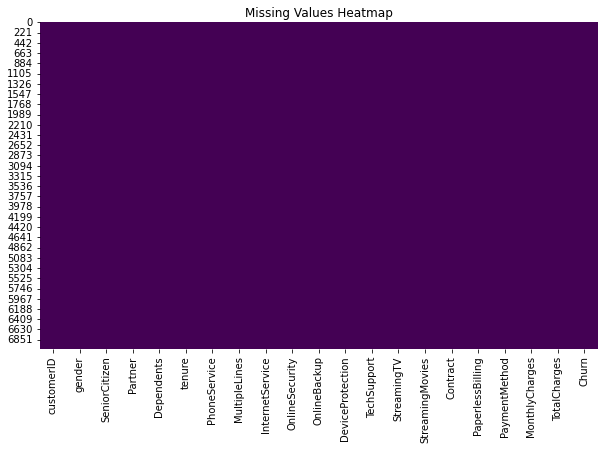

In [7]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)

# Identify outliers (e.g., z-score > 3 or < -3)
outliers = (z_scores.abs() > 3).sum()

# Show columns with outliers
print(outliers[outliers > 0])


Series([], dtype: int64)


In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((df < lower_bound) | (df > upper_bound)).sum()

# Show columns with outliers
print(outliers_iqr[outliers_iqr > 0])


SeniorCitizen    1142
dtype: int64


C:\Users\Nachiket\AppData\Local\Temp/ipykernel_16828/1646458703.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr = ((df < lower_bound) | (df > upper_bound)).sum()


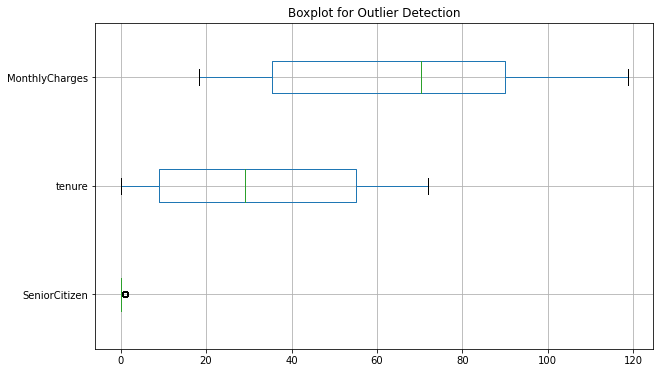

In [10]:
# Visualize outliers using boxplots
df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(10, 6), vert=False)
plt.title('Boxplot for Outlier Detection')
plt.show()


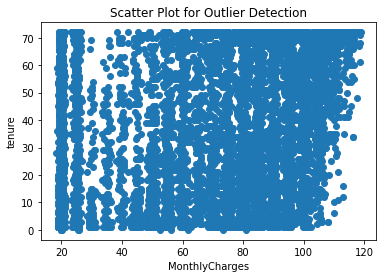

In [11]:
# Scatter plot for specific columns
plt.scatter(df['MonthlyCharges'], df['tenure'])
plt.title('Scatter Plot for Outlier Detection')
plt.xlabel('MonthlyCharges')
plt.ylabel('tenure')
plt.show()


In [12]:
dataTypes = df.dtypes

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
# Convert 'TotalCharges' to float, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [16]:
# Create a dictionary categorizing columns
column_types = {
    'string_columns': [],
    'integer_columns': [],
    'other_columns': []
}

for col in df.columns:
    if df[col].dtype == 'object':  # Likely string columns
        column_types['string_columns'].append(col)
    elif pd.api.types.is_integer_dtype(df[col]):  # Integer columns
        column_types['integer_columns'].append(col)
    else:  # Other types like floats
        column_types['other_columns'].append(col)

# Display categorized columns
print(column_types)


{'string_columns': ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], 'integer_columns': ['SeniorCitizen', 'tenure'], 'other_columns': ['MonthlyCharges', 'TotalCharges']}


In [17]:
categoricalColumns = ['customerID', 'gender', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines',
 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV',
 'StreamingMovies', 'Contract', 'PaperlessBilling',
 'PaymentMethod', 'Churn']

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
dfUpdates = df

In [20]:
# Apply label encoding
encoder = LabelEncoder()

for col in categoricalColumns:
    encodedColName = f"encoded_{col}"
    dfUpdates[encodedColName] = encoder.fit_transform(dfUpdates[col])
    

In [21]:
dfUpdates.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,encoded_OnlineSecurity,encoded_OnlineBackup,encoded_DeviceProtection,encoded_TechSupport,encoded_StreamingTV,encoded_StreamingMovies,encoded_Contract,encoded_PaperlessBilling,encoded_PaymentMethod,encoded_Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,0,0,0,0,1,2,1


In [22]:
categoricalColumns = ['customerID', 'gender', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines',
 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV',
 'StreamingMovies', 'Contract', 'PaperlessBilling',
 'PaymentMethod', 'Churn']

In [23]:
for col in categoricalColumns:
    print(col,": ", dfUpdates[col].unique())
    

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [24]:
for col in dfUpdates.columns:
    print(col,": ", dfUpdates[col].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mail

In [25]:
dfNext = dfUpdates.drop(columns=['customerID', 'encoded_customerID', 'gender', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines',
 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV',
 'StreamingMovies', 'Contract', 'PaperlessBilling',
 'PaymentMethod', 'Churn'],axis=1)

In [26]:
dfNext.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,encoded_gender,encoded_Partner,encoded_Dependents,encoded_PhoneService,encoded_MultipleLines,encoded_InternetService,encoded_OnlineSecurity,encoded_OnlineBackup,encoded_DeviceProtection,encoded_TechSupport,encoded_StreamingTV,encoded_StreamingMovies,encoded_Contract,encoded_PaperlessBilling,encoded_PaymentMethod,encoded_Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


## Exploratory Data Analysis

### Correlation Analysis

In [27]:
# Compute correlations
correlations = dfNext.corr()

# Isolate correlations with the target variable
target_correlations = correlations['encoded_Churn'].drop('encoded_Churn')  # Exclude self-correlation

# Sort correlations by absolute value
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

print(sorted_correlations)

encoded_Contract            0.396713
tenure                      0.352229
encoded_OnlineSecurity      0.289309
encoded_TechSupport         0.282492
TotalCharges                0.199484
encoded_OnlineBackup        0.195525
MonthlyCharges              0.193356
encoded_PaperlessBilling    0.191825
encoded_DeviceProtection    0.178134
encoded_Dependents          0.164221
SeniorCitizen               0.150889
encoded_Partner             0.150448
encoded_PaymentMethod       0.107062
encoded_InternetService     0.047291
encoded_StreamingMovies     0.038492
encoded_MultipleLines       0.038037
encoded_StreamingTV         0.036581
encoded_PhoneService        0.011942
encoded_gender              0.008612
Name: encoded_Churn, dtype: float64


### Note: Although the correlation values above may show weak correlation, non-linear correlation is still important. Non-linear relationships still exist, and combinations of features may hold predictive power.

In [28]:
#Multiply Tenure and Monthly Charges to Reassess Feature Engineering.

dfNext['TenureAndMonthlyChargesProduct'] = dfNext['tenure'] * dfNext['MonthlyCharges']

In [29]:
# Compute correlations
correlations = dfNext.corr()

# Isolate correlations with the target variable
target_correlations = correlations['encoded_Churn'].drop('encoded_Churn')  # Exclude self-correlation

# Sort correlations by absolute value
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

print(sorted_correlations)

encoded_Contract                  0.396713
tenure                            0.352229
encoded_OnlineSecurity            0.289309
encoded_TechSupport               0.282492
TotalCharges                      0.199484
TenureAndMonthlyChargesProduct    0.198514
encoded_OnlineBackup              0.195525
MonthlyCharges                    0.193356
encoded_PaperlessBilling          0.191825
encoded_DeviceProtection          0.178134
encoded_Dependents                0.164221
SeniorCitizen                     0.150889
encoded_Partner                   0.150448
encoded_PaymentMethod             0.107062
encoded_InternetService           0.047291
encoded_StreamingMovies           0.038492
encoded_MultipleLines             0.038037
encoded_StreamingTV               0.036581
encoded_PhoneService              0.011942
encoded_gender                    0.008612
Name: encoded_Churn, dtype: float64


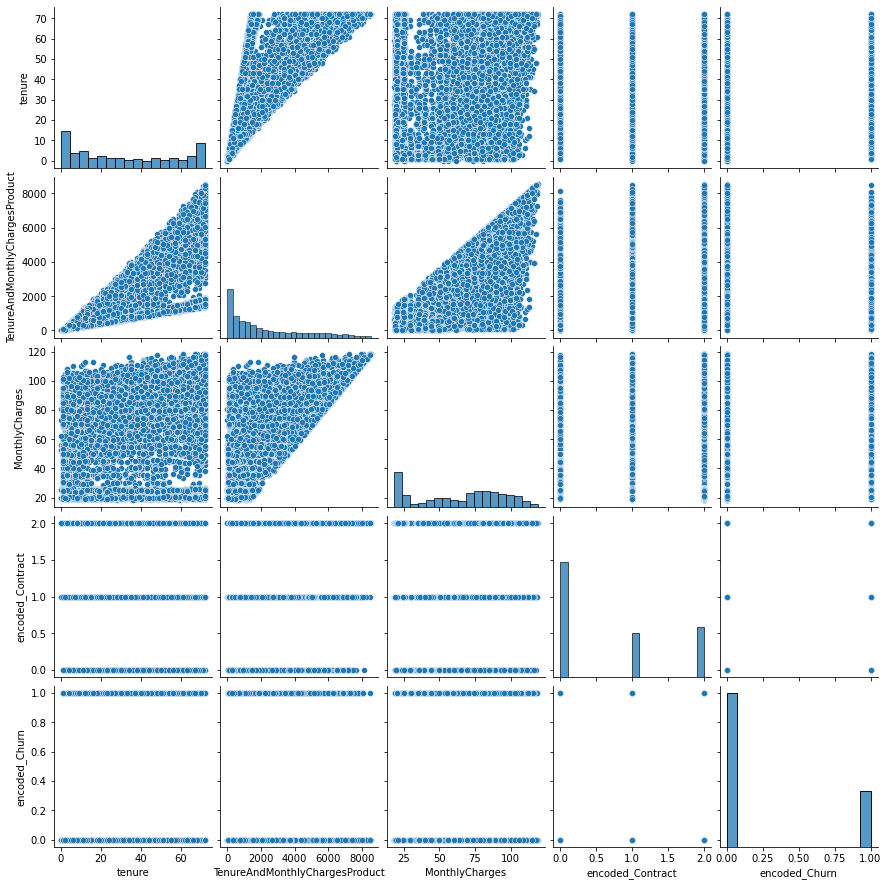

In [30]:
dfPairPlots = dfNext[['tenure', 'TenureAndMonthlyChargesProduct', 'MonthlyCharges','encoded_Contract', 'encoded_Churn']].dropna()
sns.pairplot(dfPairPlots)
plt.show()

In [31]:
df.dtypes

customerID                   object
gender                       object
SeniorCitizen                 int64
Partner                      object
Dependents                   object
tenure                        int64
PhoneService                 object
MultipleLines                object
InternetService              object
OnlineSecurity               object
OnlineBackup                 object
DeviceProtection             object
TechSupport                  object
StreamingTV                  object
StreamingMovies              object
Contract                     object
PaperlessBilling             object
PaymentMethod                object
MonthlyCharges              float64
TotalCharges                float64
Churn                        object
encoded_customerID            int32
encoded_gender                int32
encoded_Partner               int32
encoded_Dependents            int32
encoded_PhoneService          int32
encoded_MultipleLines         int32
encoded_InternetService     

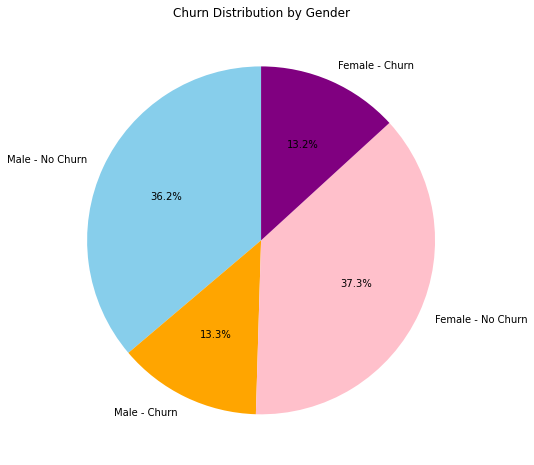

In [32]:
# Combine gender and churn
gender_churn_counts = df.groupby(['gender', 'Churn']).size()

# Flatten the multi-index into labels
labels = ['Male - No Churn', 'Male - Churn', 'Female - No Churn', 'Female - Churn']

# Plot combined pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'pink', 'purple'])
plt.title('Churn Distribution by Gender')
plt.show()

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,encoded_OnlineSecurity,encoded_OnlineBackup,encoded_DeviceProtection,encoded_TechSupport,encoded_StreamingTV,encoded_StreamingMovies,encoded_Contract,encoded_PaperlessBilling,encoded_PaymentMethod,encoded_Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,0,0,0,0,1,2,1


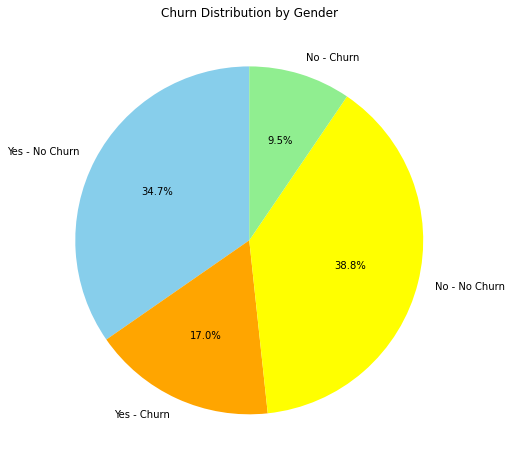

In [34]:
# Combine Partner and churn
gender_churn_counts = df.groupby(['Partner', 'Churn']).size()

# Flatten the multi-index into labels
labels = ['Yes - No Churn', 'Yes - Churn', 'No - No Churn', 'No - Churn']

# Plot combined pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'yellow', 'lightgreen'])
plt.title('Churn Distribution by Gender')
plt.show()

Churn                No  Yes
gender Dependents           
Female No          1686  774
       Yes          863  165
Male   No          1704  769
       Yes          921  161


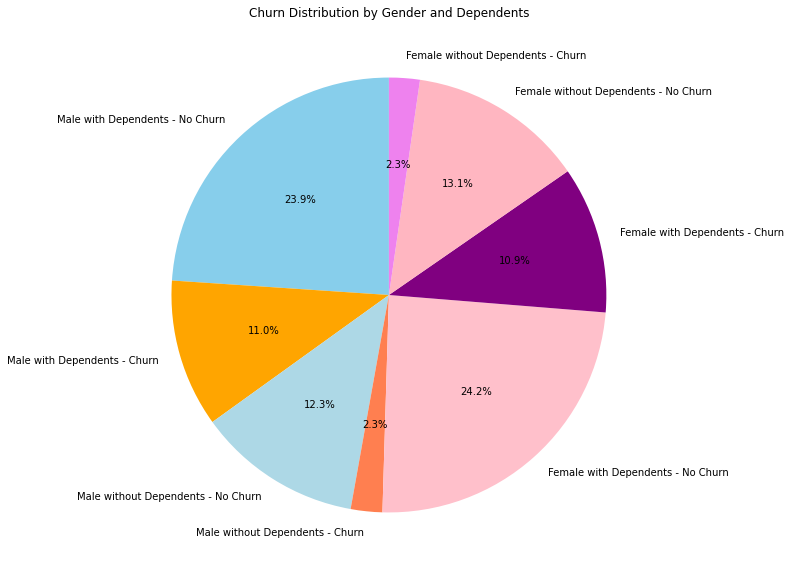

In [35]:
# Group by gender, dependents, and churn
churn_group = df.groupby(['gender', 'Dependents', 'Churn']).size().unstack(fill_value=0)

# Display grouped data
print(churn_group)

# Flatten data into a single series
combined_data = churn_group.stack()

# Create labels
labels = [
    'Male with Dependents - No Churn', 
    'Male with Dependents - Churn',
    'Male without Dependents - No Churn', 
    'Male without Dependents - Churn',
    'Female with Dependents - No Churn', 
    'Female with Dependents - Churn',
    'Female without Dependents - No Churn', 
    'Female without Dependents - Churn'
]

# Plot combined pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    combined_data, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'orange', 'lightblue', 'coral', 'pink', 'purple', 'lightpink', 'violet']
)
plt.title('Churn Distribution by Gender and Dependents')
plt.show()


In [36]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

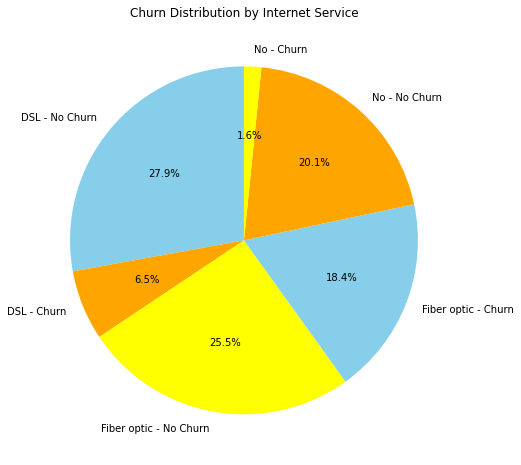

In [37]:
# Combine InternetService and churn
gender_churn_counts = df.groupby(['InternetService', 'Churn']).size()

# Flatten the multi-index into labels
labels = ['DSL - No Churn', 'DSL - Churn', 'Fiber optic - No Churn', 'Fiber optic - Churn', 'No - No Churn', 'No - Churn']

# Plot combined pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'yellow'])
plt.title('Churn Distribution by Internet Service')
plt.show()

In [38]:
#pip install ace-tools-open

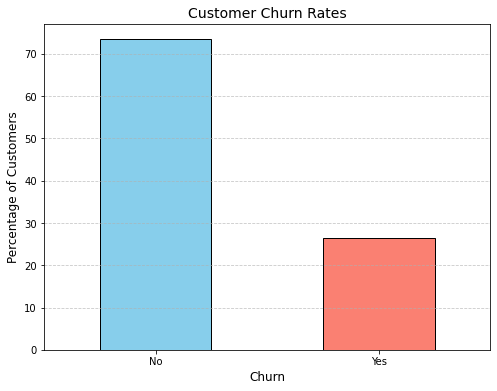

In [40]:
import matplotlib.pyplot as plt

# Calculate churn rates
churn_counts = df['Churn'].value_counts(normalize=True) * 100

# Visualize churn rates
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Customer Churn Rates', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Group by churn and calculate means for numerical columns
churn_analysis = df.groupby('Churn').mean(numeric_only=True)




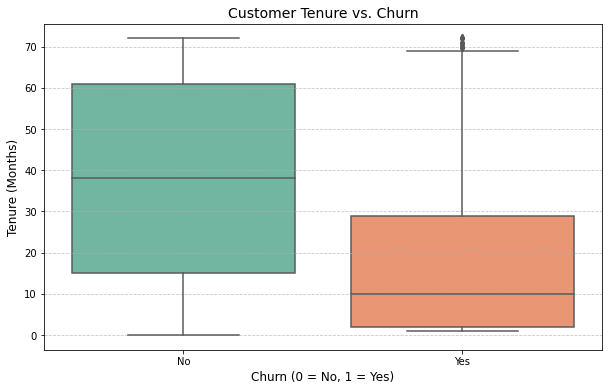

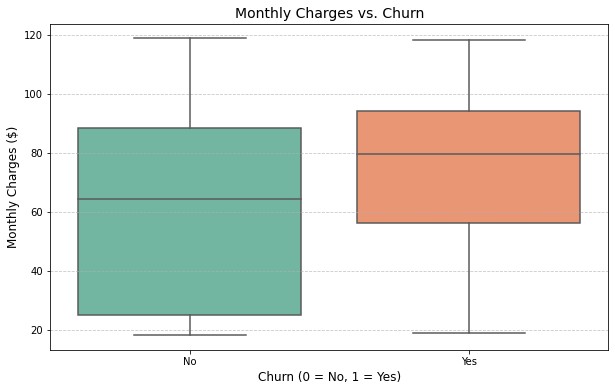

In [42]:
# Visualize key trends with respect to churn
import seaborn as sns

# Plot tenure vs. churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Customer Tenure vs. Churn', fontsize=14)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot MonthlyCharges vs. churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges vs. Churn', fontsize=14)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Plot MonthlyCharges vs. churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')
plt.title('Total Charges vs. Churn', fontsize=14)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Total Charges ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Analyzing categorical variables by churn
categorical_analysis = df.groupby('Churn').mean()




## Classification Using Machine Learning

In [47]:
# Reconfirm the train-test split process and redefine X_train and X_test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler



# Features and target split
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# Check for missing values in the feature set after encoding
missing_values = X.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]
# Fill missing values with the median value for numerical columns
X = X.fillna(X.median())

# Recheck if there are any remaining missing values
missing_values_after = X.isnull().sum()

# Confirm that all missing values are handled
missing_values_after[missing_values_after > 0]
# Confirm handling of missing values with a robust replacement for all features
X = X.fillna(0)  # Replace any remaining NaN values with 0

# Recheck for missing values
missing_values_final_check = X.isnull().sum().sum()  # Total missing values

# Output the result to ensure no missing values remain
missing_values_final_check



# Attempting a robust check and handling of NaN and invalid values again
# Replace missing values in the entire DataFrame with 0 as a fallback
X = X.fillna(0)

# Ensure no columns contain invalid values
X = X.replace([float('inf'), float('-inf')], 0)

# Confirm all data is numeric and no NaNs are present
X = pd.DataFrame(X).apply(pd.to_numeric, errors='coerce')

# Re-run train-test split to confirm integrity of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical features again
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirm the process is now complete
X_train[:5]


C:\Users\Nachiket\AppData\Local\Temp/ipykernel_16828/568119132.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(X.median())
C:\Users\Nachiket\anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Nachiket\anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


array([[            nan, -4.36830924e-01,             nan,
                    nan,  8.81077861e-01,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,  1.95926774e-01,
         6.53961933e-01, -2.79260136e-02,  9.68055593e-01,
         1.03006640e+00,  1.51871844e+00,  3.23478184e-01,
         1.10160075e+00, -1.18351794e+00, -9.21835355e-01,
         1.23507425e+00, -1.02176855e+00,  1.39695759e+00,
         1.14061746e+00, -1.13047172e+00,  3.66429879e-01,
         8.41222328e-01,  4.03988610e-01, -5.96874021e-01],
       [            nan, -4.36830924e-01,             nan,
                    nan, -1.28426262e+00,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             n

In [54]:
# Reload the dataset to start fresh
df = pd.read_csv('TELCO.csv')

# Check for missing values and invalid entries again
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.fillna(0)  # Replace any remaining NaN with 0

# Re-encode categorical variables using pd.get_dummies for one-hot encoding
X = pd.get_dummies(df.drop(columns=['customerID', 'Churn']), drop_first=True)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Binary encoding for Churn

# Recheck all numerical integrity for X
X = pd.DataFrame(X).apply(pd.to_numeric, errors='coerce')

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirm data preparation is complete
#X_train[:5], X_test[:5]



# Re-run classification models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predict on test set
logistic_preds = logistic_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)

# Evaluate models
logistic_report = classification_report(y_test, logistic_preds, output_dict=True)
decision_tree_report = classification_report(y_test, decision_tree_preds, output_dict=True)
random_forest_report = classification_report(y_test, random_forest_preds, output_dict=True)

# ROC-AUC scores
logistic_roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
random_forest_roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Summarize results
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, logistic_preds),
                 accuracy_score(y_test, decision_tree_preds),
                 accuracy_score(y_test, random_forest_preds)],
    "ROC-AUC": [logistic_roc_auc, decision_tree_roc_auc, random_forest_roc_auc]
})




In [55]:
model_performance

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.812589,0.858856
1,Decision Tree,0.737814,0.660412
2,Random Forest,0.795551,0.838606


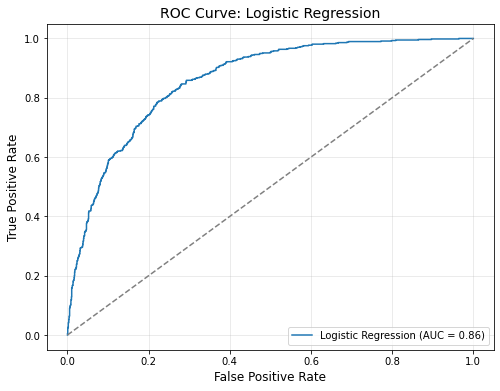

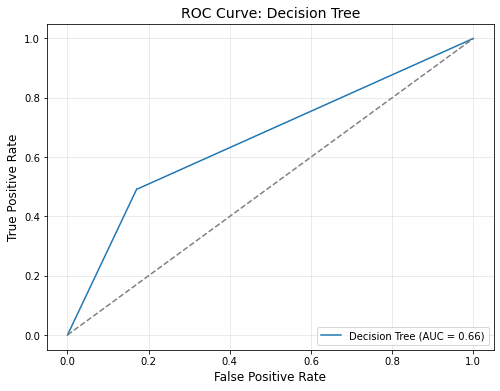

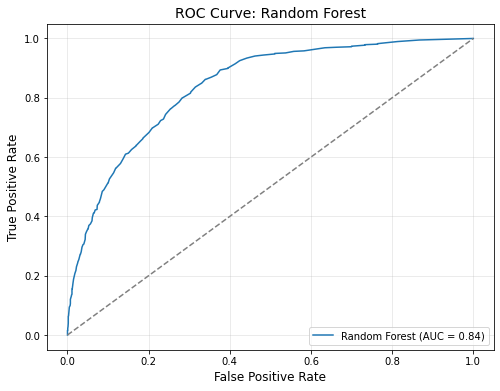

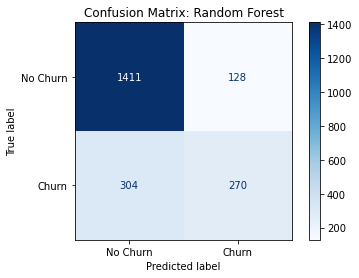

In [56]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'ROC Curve: {model_name}', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

# Logistic Regression ROC curve
plot_roc_curve(logistic_model, X_test, y_test, 'Logistic Regression')

# Decision Tree ROC curve
plot_roc_curve(decision_tree_model, X_test, y_test, 'Decision Tree')

# Random Forest ROC curve
plot_roc_curve(random_forest_model, X_test, y_test, 'Random Forest')

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, random_forest_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Random Forest')
plt.show()
